In [1]:
import glob
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
files = glob.glob("*.csv")

d = []

for f in sorted(files):
    print(f)

    df = pd.read_csv(f, parse_dates=["date"]).sort_values(by=["date"], ignore_index=True)
    # df.plot(x="date", y="risepercent")
    max_index = df["risepercent"].idxmax()
    max_rise = df.loc[max_index, "risepercent"]
    start_time = df["date"].iloc[0]
    max_time = df.loc[max_index, "date"]
    duration_hours = (max_time - start_time).seconds / 3600

    # print(start_time, max_rise, duration_hours)
    d.append({
        "start_time": start_time,
        "rise_percent": max_rise,
        "duration_hours": duration_hours
    })
    # plt.show()
    # break

dates = [
    "2021-01-26",
    "2021-01-27",
    "2021-01-28",
    "2021-01-29",
    "2021-01-31",
    "2021-02-01",
    "2021-02-02",
    "2021-02-06",
    "2021-02-07",
    "2021-02-08",
    "2021-02-09",
    "2021-02-10",
    "2021-02-11",
]

for date in dates:
    d.append({
        "start_time": pd.to_datetime(date),
        "rise_percent": None,
        "duration_hours": None
    })

df_out = pd.DataFrame(d).sort_values(by=["start_time"], ignore_index=True)
df_out["start_time"] = df_out["start_time"].dt.date
df_out = df_out.set_index("start_time")

df_out


10_20210125-155607_20210125-115332.csv
12_20210130-065142_20210130-025809.csv
13_20210130-114525_20210130-133541.csv
14_20210130-203358_20210130-160218.csv
16_20210203-232725_20210203-124049.csv
17_20210204-023831_20210204-081800.csv
18_20210205-030416_20210205-124638.csv
19_20210212-005435_20210212-093547.csv
20_20210212-131454_20210212-162622.csv
5_20210122-032409_20210122-000238.csv
6_20210122-173029_20210122-155914.csv
7_20210123-063234_20210123-030001.csv
8_20210124-212100_20210124-155813.csv
9_20210125-013238_20210125-060217.csv


,rise_percent,duration_hours
start_time,,
2021-01-21,108.3333,4.828889
2021-01-22,176.4706,5.032222
2021-01-23,164.7059,7.418889
2021-01-24,188.2353,7.702500
2021-01-25,242.8571,5.212778
2021-01-25,194.7368,4.343889
2021-01-26,NaN,NaN
2021-01-27,NaN,NaN
2021-01-28,NaN,NaN


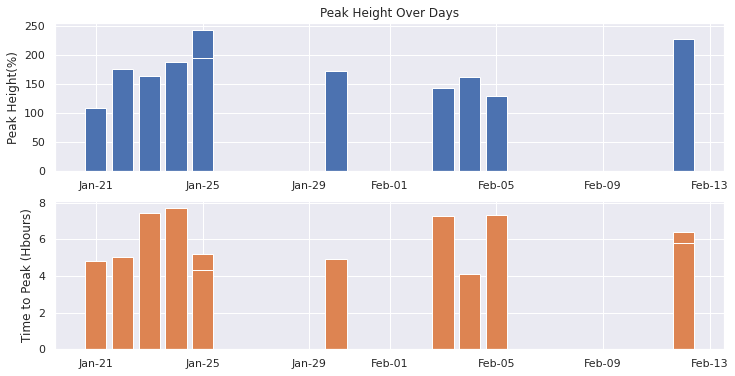

In [3]:
colors = sns.color_palette()

fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].bar(df_out.index.values, df_out["rise_percent"], color=colors[0])
ax[0].set_ylabel("Peak Height(%)")

ax[1].bar(df_out.index.values, df_out["duration_hours"], color=colors[1])
ax[1].set_ylabel("Time to Peak (Hbours)")

ax[0].set_title("Peak Height Over Days")
for a in ax:
    a.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

plt.savefig("max-rise-over-time.png")

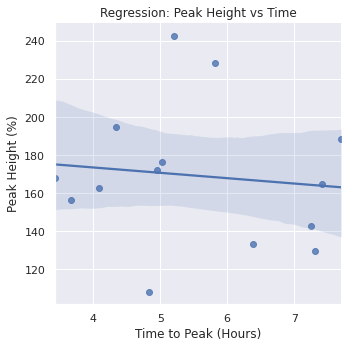

In [4]:

sns.lmplot(y="rise_percent", x="duration_hours", data=df_out)
ax = plt.gca()
ax.set_xlabel("Time to Peak (Hours)")
ax.set_ylabel("Peak Height (%)")
ax.set_title("Regression: Peak Height vs Time")
plt.tight_layout()
plt.savefig("regression.png")
